# Main Dashboard of PhD experiments in post silicon (specspeed)

In [1]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pca.pca import *
import pandas as pd

filename = 'post_silicon/summary_phd.csv'
df_data = pd.read_csv(filename)
df_data.fillna(0,inplace=True)

if os.path.exists(filename):
    df = pd.read_csv(filename)
    display(df)
    df_ = df.loc[:, df.columns != 'test_name']
    df_ = (df_-df_.min())/(df_.max()-df_.min())
    extracted_col = df["test_name"]
    df_.insert(0, 'test_name', extracted_col)
    df_.set_index('test_name')
    df_.to_csv('normalized_df.csv')
    df = df_

    features = list(df.columns)[2:]
    test_column = list(df.columns)[0]
    print(features)
    pca_df = get_PCA(df, features)
    
else:
    print("Filename error")

,test_name,Kind,branch_misses,cache_misses,ipc,l1_dcache_load_misses
0,603.bwaves_s,0,0.13,96.237,0.28,5.04
1,607.cactuBSSN_s,0,0.16,71.072,0.37,22.01
2,619.lbm_s,0,2.28,92.758,0.08,26.26
3,621.wrf_s,0,1.29,24.804,0.19,10.33
4,627.cam_s,0,0.69,73.421,0.34,8.30
5,628.pop2_s,0,0.83,53.197,0.11,8.95
6,638.imagick_s,0,0.65,49.983,1.32,5.27
7,644.nab_s,0,2.44,36.855,0.83,2.63
8,649.fotonik3d_s,0,0.19,94.701,0.15,4.96
9,654.roms_s,0,0.35,58.811,0.29,8.08


['branch_misses', 'cache_misses', 'ipc', 'l1_dcache_load_misses']


# Plot in 2D w/o clasification 

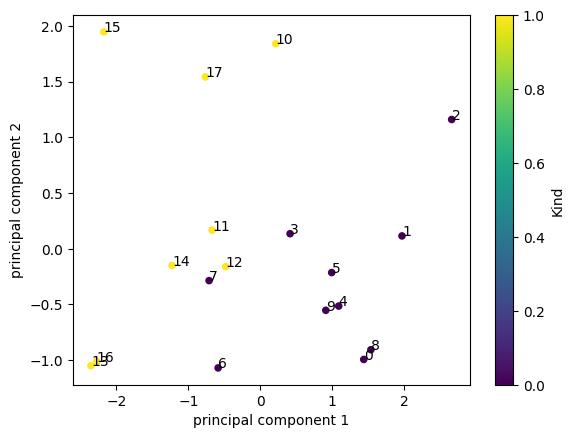

In [2]:
pca_df_new = pca_df
pca_df_new['Kind'] = df[['Kind']].copy()

ax1 = pca_df_new.plot.scatter(x='principal component 1',y='principal component 2',c='Kind', colormap='viridis')
for i, label in enumerate(pca_df_new['test_name']):
    plt.annotate(i, (pca_df_new['principal component 1'][i], pca_df_new['principal component 2'][i]))

## Explained variance

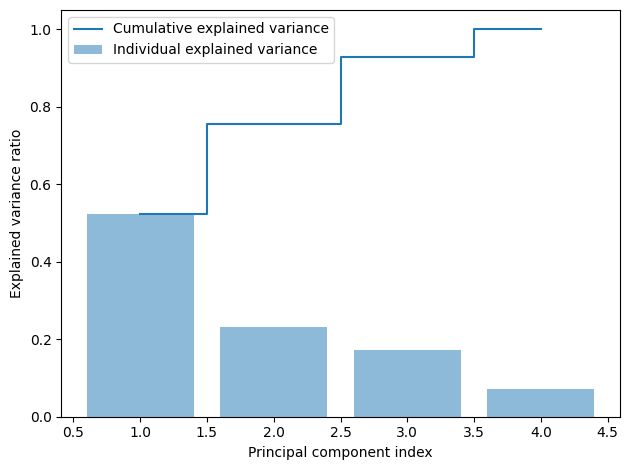

In [3]:
from pca.pca import *
x = get_features(df_data,features)
X_std = StandardScaler().fit_transform(x)
exp_var_pca = get_explained_variance(X_std)
plot_explained_variance(exp_var_pca)

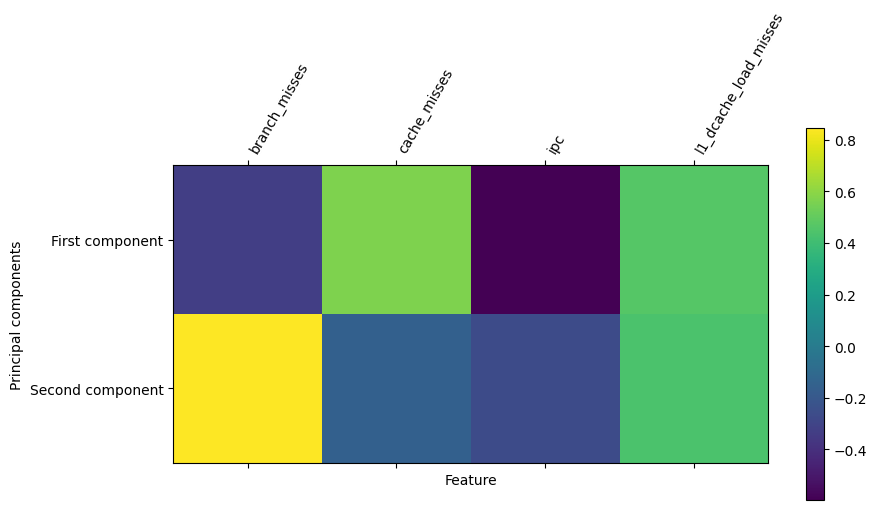

In [4]:
from pca.pca import *
plot_pca_vectors(X_std, features)

# Plot characteristics of the worklaods

,Kind of workload,branch_misses,cache_misses,ipc,l1_dcache_load_misses
0,Floating point,0.9010,65.183900,0.396,10.18300
1,Integer,3.7825,20.971125,1.110,6.87625


,branch_misses,cache_misses,ipc,l1_dcache_load_misses
Kind,,,,
0,0.9010,65.183900,0.396,10.18300
1,3.7825,20.971125,1.110,6.87625


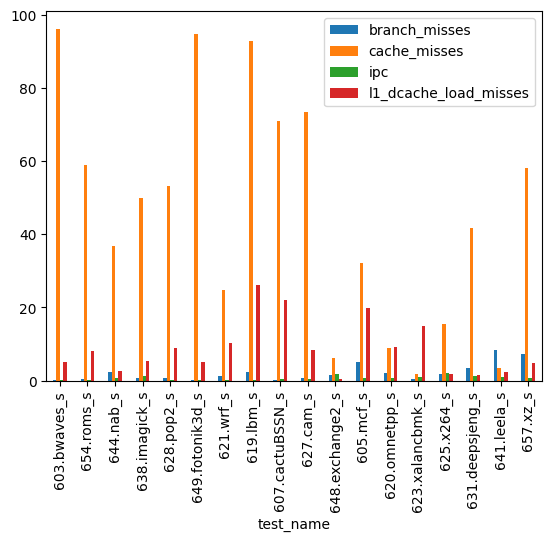

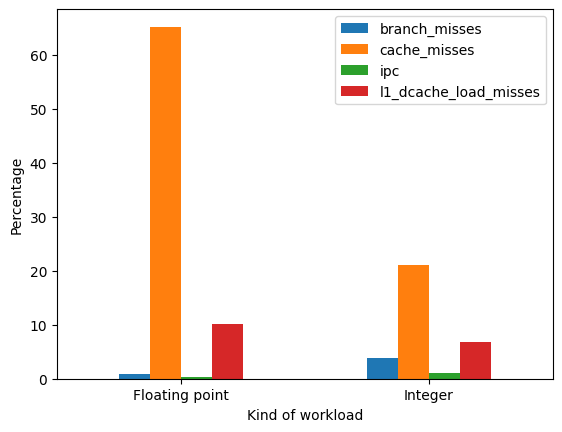

In [5]:
df = pd.read_csv(filename)
df = df.sort_values(by=['Kind'])
df = df.drop('Kind', axis=1)
df.plot.bar(x="test_name")

df = pd.read_csv(filename)
df_tmp = df_groups_summary = df.groupby(['Kind']).mean()
df_groups_summary = df.groupby(['Kind']).mean().reset_index()

df_groups_summary.loc[0, "Kind"] = "Floating point"
df_groups_summary.loc[1, "Kind"] = "Integer"
df_groups_summary.rename(columns={'Kind': "Kind of workload"}, inplace=True)


display(df_groups_summary)
ax = df_groups_summary.plot.bar(x='Kind of workload', rot=0, ylabel="Percentage")

df_groups_summary = df_tmp
display(df_groups_summary)

#for container in ax.containers:
#    ax.bar_label(container)




'Optimal number of clusters = 4'

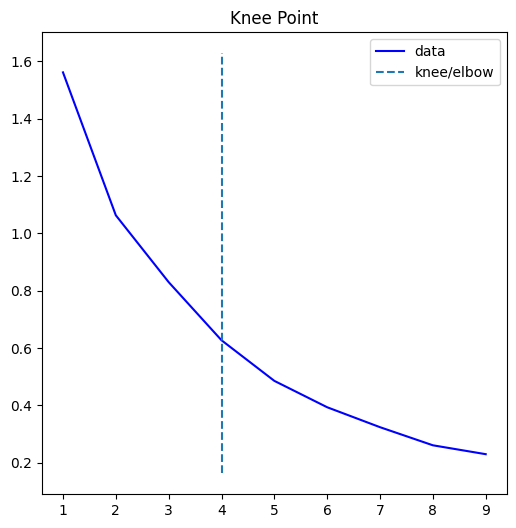

In [6]:
from clustering.distortion import *
from clustering.cluster_score import *
clusters = calculate_elbow(pca_df)[0]
display(f"Optimal number of clusters = {clusters}")

In [7]:
print(f'Optimal number of clusters = {clusters}')

Optimal number of clusters = 4


## Clasification based on optimal number of clusters

In [9]:
from clustering.clustering import *

df_result,kmeans,SSE = kmean_cluster(pca_df,clusters)

print(df_result)

   PRED        test_name
0     0     603.bwaves_s
0     0  607.cactuBSSN_s
0     0        619.lbm_s
0     0        621.wrf_s
0     0        627.cam_s
0     0       628.pop2_s
0     0  649.fotonik3d_s
0     0       654.roms_s
1     1        605.mcf_s
1     1      641.leela_s
1     1         657.xz_s
2     2    638.imagick_s
2     2        644.nab_s
2     2    620.omnetpp_s
2     2  623.xalancbmk_s
2     2  631.deepsjeng_s
3     3       625.x264_s
3     3  648.exchange2_s


## Clasification based on FP/INT clusters

,cluster,test_name,principal component 1,principal component 2
1,1,603.bwaves_s,1.439857,-0.993053
1,1,605.mcf_s,0.215640,1.839375
1,1,607.cactuBSSN_s,1.971464,0.115144
1,1,619.lbm_s,2.662381,1.159666
0,0,620.omnetpp_s,-0.669243,0.166962
1,1,621.wrf_s,0.414887,0.134920
0,0,623.xalancbmk_s,-0.480402,-0.161037
0,0,625.x264_s,-2.354665,-1.049468
1,1,627.cam_s,1.091433,-0.514099
1,1,628.pop2_s,0.993906,-0.213617


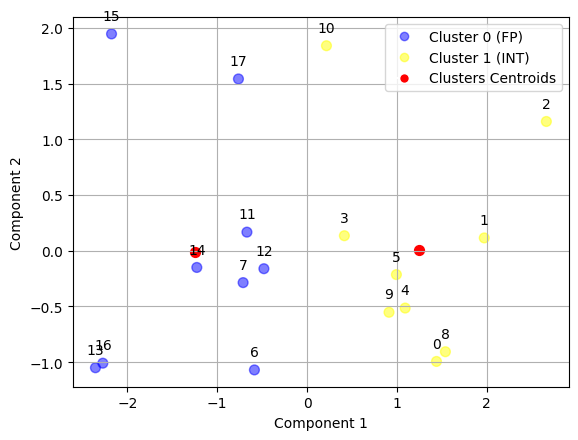

In [11]:
#from clustering.clustering import *

import matplotlib.pyplot as plt
import numpy as np

def plot_kmeans(df, kmeans):
    centroids = kmeans.cluster_centers_
    cluster_colors = ['blue', 'yellow']  # Custom colors for clusters
    
    # Create a custom colormap based on the cluster colors
    cmap = plt.cm.colors.ListedColormap(cluster_colors)
    
    # Create a scatter plot for the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label='Centroids')
    
    # Create a scatter plot for the data points using the custom colormap
    scatter = plt.scatter(df['principal component 1'], df['principal component 2'], c=kmeans.labels_, cmap=cmap, s=50, alpha=0.5, label='Data Points')
    
    for i, label in enumerate(df['test_name']):
        plt.annotate(i, (df['principal component 1'][i], df['principal component 2'][i]), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid()
    
    # Create a legend using the scatter plot handles and labels
    plt.legend(handles=[scatter.legend_elements()[0][0], scatter.legend_elements()[0][1], plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=7)], labels=['Cluster 0 (FP)', 'Cluster 1 (INT)', 'Clusters Centroids'])
    
    plt.show()

df_result,kmeans,SSE = kmean_cluster(pca_df,2)
# create a DF based on KMEANS prediuction
df_clusters = df_result[['PRED', 'test_name']].copy()
df_clusters.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters["principal component 1"] = pca_df_sorted["principal component 1"].values
df_clusters["principal component 2"] = pca_df_sorted["principal component 2"].values
df_clusters.rename(columns={'PRED': 'cluster'}, inplace=True)
display(df_clusters)
plot_kmeans(pca_df, kmeans)

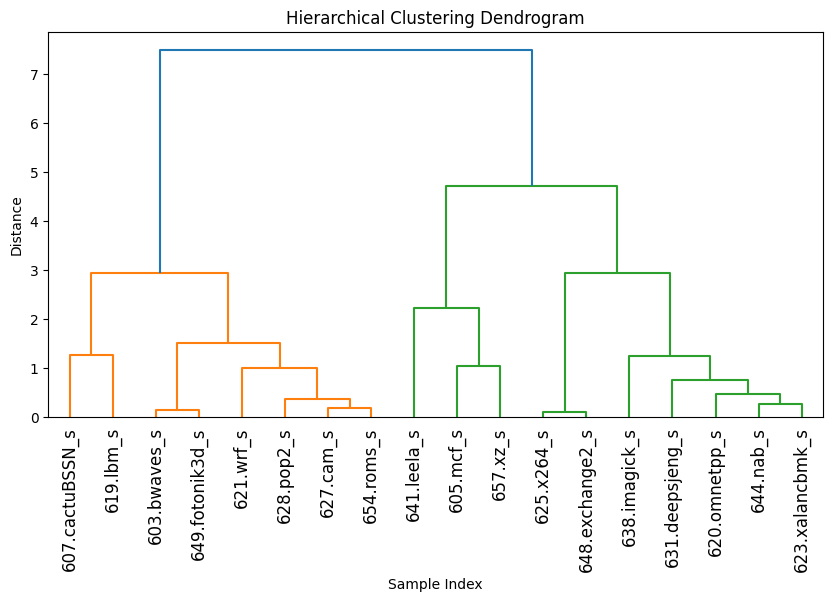

In [12]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = pca_df[['principal component 1', 'principal component 2']].copy()

# Perform hierarchical clustering to obtain the linkage matrix
Z = hierarchy.linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z,labels=pca_df['test_name'].values)

# Rotate the labels vertically
plt.xticks(rotation=90)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
df_result,kmeans = kmean_cluster(pca_df,2)
print(df_result)

# create a DF based on KMEANS prediuction
df_clusters = df_result[['PRED', 'test_name']].copy()
df_clusters.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters["principal component 1"] = pca_df_sorted["principal component 1"].values
df_clusters["principal component 2"] = pca_df_sorted["principal component 2"].values
df_clusters.rename(columns={'PRED': 'cluster'}, inplace=True)
display(df_clusters)

# create a DF based on real known kind
df_clusters_ = df_data[['Kind', 'test_name']].copy()
df_clusters_.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted_ = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters_["principal component 1"] = pca_df_sorted_["principal component 1"].values
df_clusters_["principal component 2"] = pca_df_sorted_["principal component 2"].values
df_clusters_.rename(columns={'Kind': 'cluster'}, inplace=True)
display(df_clusters_)


## Automatic label of clusters based cosine similarity to FP/INT


\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation}


A = PRED -> 0
cosine_similarity vs fp_tests 0.21081851067789195
cosine_similarity vs int_tests 0.8249579113843053
cosine_similarity_int > cosine_similarity_fp
Assigining 1 label to pred cluster

B = PRED -> 1
cosine_similarity vs fp_tests 0.7378647873726218
cosine_similarity vs int_tests 0.1178511301977579
cosine_similarity_fp > cosine_similarity_int
Assigining 0 label to pred cluster


,labels,val_pred,val_true
8,657.xz_s,1,1
16,654.roms_s,0,0
15,649.fotonik3d_s,0,0
7,648.exchange2_s,1,1
1,644.nab_s,1,0
6,641.leela_s,1,1
0,638.imagick_s,1,0
5,631.deepsjeng_s,1,1
14,628.pop2_s,0,0
13,627.cam_s,0,0


,labels,val_pred,val_true
1,644.nab_s,1,0
0,638.imagick_s,1,0
17,605.mcf_s,0,1



adjusted_rand_score 0.41017733230531994

normalized_mutual_info_score 0.35894624660910607

fowlkes_mallows_score 0.6896715738353066

hamming_distance 0.16666666666666666


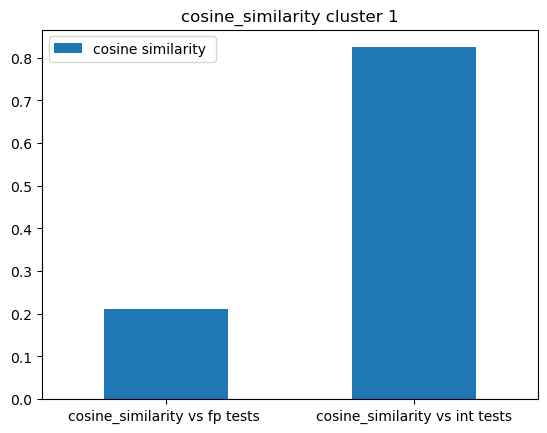

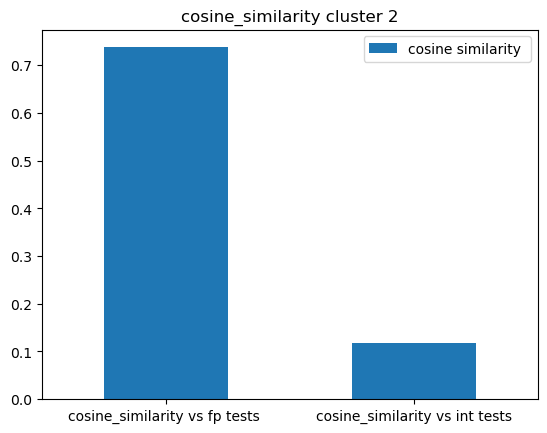

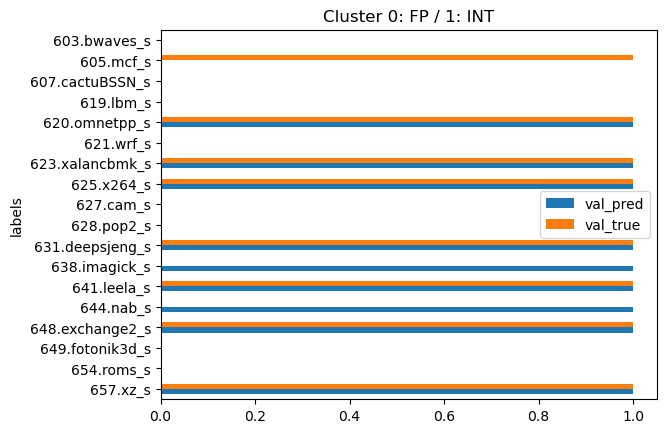

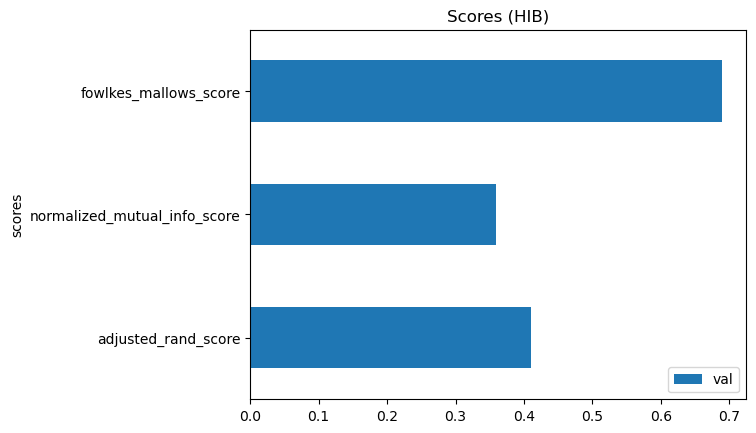

In [11]:
df = pd.read_csv("references/clusters_spec2017.csv")
df_sorted = df.sort_values(by='REAL')
fp_tests = df_sorted[df_sorted['REAL'] == 0]
int_tests = df_sorted[df_sorted['REAL'] == 1]

df = pd.read_csv("clusters.csv")
df_sorted = df.sort_values(by='PRED')
A = df_sorted[df_sorted['PRED'] == 0]
B = df_sorted[df_sorted['PRED'] == 1]

C = normalize(A,B,fp_tests,int_tests)
C_sorted =  C.sort_values(by='test_name', ascending=False)

REAL = pd.read_csv("references/clusters_spec2017.csv")
REAL_sorted = REAL.sort_values(by='test_name', ascending=False)

labels_pred = C_sorted["PRED"].tolist()
labels_pred_ = [eval(i) for i in labels_pred]
labels_pred = labels_pred_

labels_true = REAL_sorted["REAL"].tolist()

df = pd.DataFrame({'labels':C_sorted['test_name'], 'val_pred':labels_pred, 'val_true':labels_true})
display(df)
df.to_csv("clusters.csv")

print()
df_ = df.loc[~(df['val_pred'] == df['val_true'])]
display(df_)

ax = df.plot.barh(x='labels', y=['val_pred','val_true'],  rot=0, title= "Cluster 0: FP / 1: INT")

scores_result = scores(labels_true,labels_pred)

df = pd.DataFrame({'scores':['adjusted_rand_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score'], 'val':scores_result[:-1]})
ax = df.plot.barh(x='scores', y='val', rot=0, title= "Scores (HIB)")

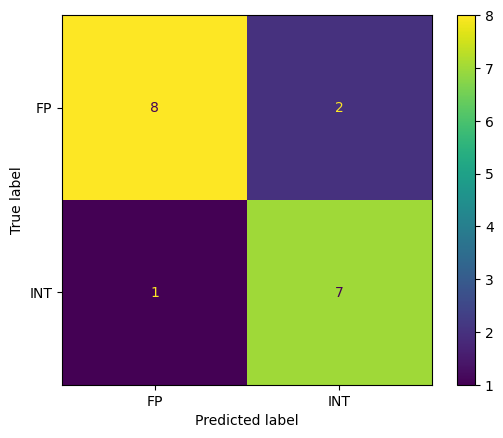

In [12]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

df = pd.read_csv('clusters.csv')
actual = df['val_true'].tolist()
predicted = df['val_pred'].tolist()

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['FP', 'INT'])

cm_display.plot()
plt.show()

# Get the test cases closer to centroid

In [13]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
pca_df.iloc[closest]

,Unnamed: 0,principal component 1,principal component 2,test_name
14,14,-1.226819,-0.149851,631.deepsjeng_s
5,5,0.993906,-0.213617,628.pop2_s


## Use supervised ML to validate with testing and training data

In [14]:
# Use known kind based on SPEC documentation
X = pca_df_new[["principal component 1","principal component 2"]]
y = pca_df_new[["Kind"]]

# Use known kind based on KMEANS prediction
#X = df_clusters[["principal component 1","principal component 2"]]
#y = df_clusters[["cluster"]]

accuracy_results = {}

### K-Nearest Neighbors Algorithm better accuracy

In [15]:
# Split into training and test set
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn_score = 0

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train,y_train.values.ravel())
    print(knn.score(X_test, y_test))
    knn_score += knn.score(X_test, y_test)
    

print(f'knn.score average  = {knn_score/10}')
accuracy_results['knn_score'] = knn_score/10

1.0
0.5
0.75
0.5
0.75
1.0
1.0
0.75
0.75
0.75
knn.score average  = 0.775


### Decision Tree Algorithm


In [16]:
from statistics import mean
from statistics import stdev
def get_accuracty(X,y,loops,clf):
    p_total = []
    r_total = []
    f_total = []

    for i in range(loops):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        clf.fit(X_train,y_train)

        # Predict Accuracy Score
        y_pred = clf.predict(X_test)
        p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)
        p_total.append(p)
        r_total.append(r)
        f_total.append(f)
    return p_total,r_total,f_total


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# Split into training and test set
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

loops = 10
clf = DecisionTreeClassifier()
p_total_wpca,r_total_wpca,f_total_wpca = get_accuracty(X,y,loops,clf)
    
print(f"Precision score {mean(p_total_wpca)} STED {stdev(p_total_wpca)}")
print(f"Recall score {mean(r_total_wpca)} STED {stdev(p_total_wpca)}")
print(f"F-beta score {mean(f_total_wpca)} STED {stdev(p_total_wpca)}")

accuracy_results['Decision_Tree_precision_score_wpca'] = mean(p_total_wpca)
accuracy_results['Decision_Tree_recall_score_wpca'] = mean(r_total_wpca)
accuracy_results['Decision_Tree_F_score_wpca'] = mean(f_total_wpca)

Precision score 0.76 STED 0.21800866445574538
Recall score 0.7725 STED 0.21800866445574538
F-beta score 0.73 STED 0.21800866445574538


### Decision Tree Algorithm w/o PCA


In [17]:
from statistics import mean
from statistics import stdev

def get_accuracty(X,y,loops,clf):
    p_total = []
    r_total = []
    f_total = []

    for i in range(loops):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        clf.fit(X_train,y_train)

        # Predict Accuracy Score
        y_pred = clf.predict(X_test)
        p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)
        p_total.append(p)
        r_total.append(r)
        f_total.append(f)
    return p_total,r_total,f_total

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# Split into training and test set
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

loops = 10
clf = DecisionTreeClassifier()

filename = 'post_silicon/summary_phd.csv'
df_data = pd.read_csv(filename)
df_data.fillna(0,inplace=True)

if os.path.exists(filename):
    df = pd.read_csv(filename)
    display(df)
    df_ = df.loc[:, df.columns != 'test_name']
    df_ = (df_-df_.min())/(df_.max()-df_.min())
    extracted_col = df["test_name"]
    df_.insert(0, 'test_name', extracted_col)
    df_.set_index('test_name')
    df_.to_csv('normalized_df.csv')
    df = df_
    features = list(df.columns)[2:]
    test_column = list(df.columns)[0]
    x = df.loc[:, features].values
    X_std = StandardScaler().fit_transform(x)
    y = df['Kind']

p_total,r_total,f_total = get_accuracty(x,y,loops,clf)

print(f"Precision score {mean(p_total)} STED {stdev(p_total)}")
print(f"Recall score {mean(r_total)} STED {stdev(p_total)}")
print(f"F-beta score {mean(f_total)} STED {stdev(p_total)}")

accuracy_results['Decision_Tree_precision_score'] = mean(p_total)
accuracy_results['Decision_Tree_recall_score'] = mean(r_total)
accuracy_results['Decision_Tree_F_score'] = mean(f_total)

,test_name,Kind,branch_misses,cache_misses,ipc,l1_dcache_load_misses
0,603.bwaves_s,0,0.13,96.237,0.28,5.04
1,607.cactuBSSN_s,0,0.16,71.072,0.37,22.01
2,619.lbm_s,0,2.28,92.758,0.08,26.26
3,621.wrf_s,0,1.29,24.804,0.19,10.33
4,627.cam_s,0,0.69,73.421,0.34,8.30
5,628.pop2_s,0,0.83,53.197,0.11,8.95
6,638.imagick_s,0,0.65,49.983,1.32,5.27
7,644.nab_s,0,2.44,36.855,0.83,2.63
8,649.fotonik3d_s,0,0.19,94.701,0.15,4.96
9,654.roms_s,0,0.35,58.811,0.29,8.08


Precision score 0.7391666666666666 STED 0.20753736834425568
Recall score 0.8016666666666666 STED 0.20753736834425568
F-beta score 0.7233333333333334 STED 0.20753736834425568


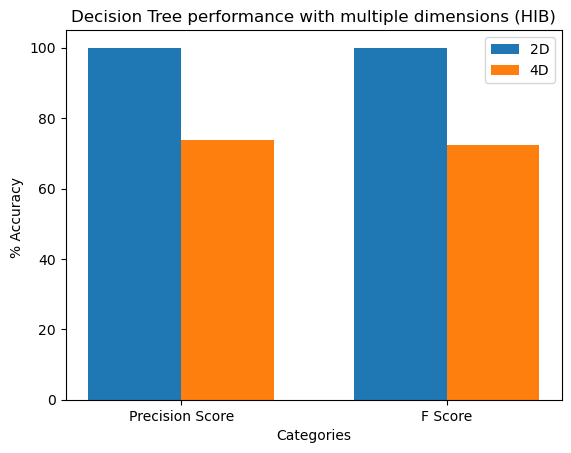

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
from statistics import stdev

# Sample data for dataframe 1
#data1 = {'Category': ['Precision Score', 'F Score'],
#         '2D': [mean(p_total_wpca)*100, mean(f_total_wpca)*100]}
data1 = {'Category': ['Precision Score', 'F Score'],
         '2D': [100, 100]}
df1 = pd.DataFrame(data1)

# Sample data for dataframe 2
data2 = {'Category': ['Precision Score', 'F Socre'],
         '4D': [mean(p_total)*100, mean(f_total)*100]}
df2 = pd.DataFrame(data2)

# Create the figure and subplot
fig, ax = plt.subplots()

# Plotting bars for dataframe 1
width = 0.35
x = range(len(df1['Category']))
ax.bar(x, df1['2D'], width, label='2D')

# Plotting bars for dataframe 2 next to the bars from dataframe 1
ax.bar([i + width for i in x], df2['4D'], width, label='4D')

# Customize the plot
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(df1['Category'])
ax.set_xlabel('Categories')
ax.set_ylabel('% Accuracy ')
ax.set_title('Decision Tree performance with multiple dimensions (HIB)')
ax.legend()

# Show the plot
plt.show()


,algorithm,accuracy
0,knn_score,0.775000
1,Decision_Tree_precision_score_wpca,0.760000
2,Decision_Tree_recall_score_wpca,0.772500
3,Decision_Tree_F_score_wpca,0.730000
4,Decision_Tree_precision_score,0.739167
5,Decision_Tree_recall_score,0.801667
6,Decision_Tree_F_score,0.723333


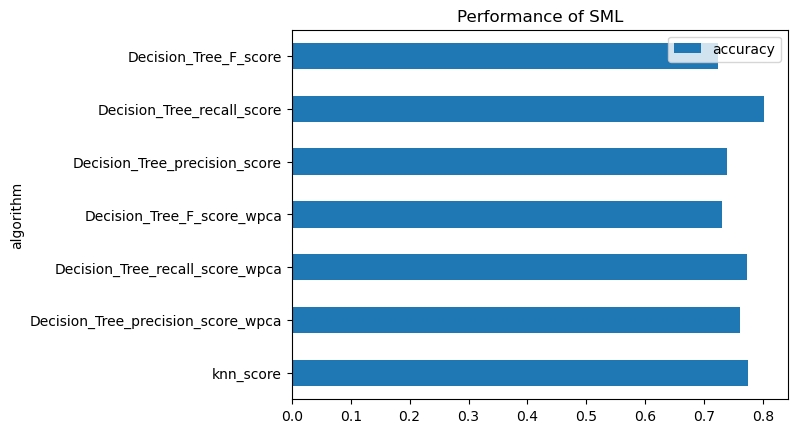

In [19]:
accuracy_results_df = pd.DataFrame(list(accuracy_results.items()),columns=['algorithm','accuracy'])
display(accuracy_results_df)
#ccuracy_results_df = accuracy_results_df.drop([0,2])
#isplay(accuracy_results_df)
accuracy_results_df.plot.barh(x='algorithm', title = 'Performance of SML');

# Test model with SPEC-RATE 

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pca.pca import *
import pandas as pd

filename = 'post_silicon/summary_phd_specrate.csv'
df_data = pd.read_csv(filename)
df_data.fillna(0,inplace=True)

if os.path.exists(filename):
    df = pd.read_csv(filename)
    df_ = df.loc[:, df.columns != 'test_name']
    df_ = (df_-df_.min())/(df_.max()-df_.min())
    extracted_col = df["test_name"]
    df_.insert(0, 'test_name', extracted_col)
    df_.set_index('test_name')
    df_.to_csv('normalized_df.csv')
    df = df_
    features = list(df.columns)[2:]
    test_column = list(df.columns)[0]
    pca_df_specrate = get_PCA(df, features)
    pca_df_specrate_new = pca_df_specrate
    pca_df_specrate_new['Kind'] = df[['Kind']].copy()
else:
    print("Filename error")

In [21]:
display(pca_df_specrate)
X_specrate = pca_df_specrate_new[["principal component 1","principal component 2"]]
y_specrate = pca_df_specrate_new[["Kind"]]

,principal component 1,principal component 2,test_name,Kind
0,0.140541,-0.000475,502.gcc_r,1.0
1,1.104868,-1.625813,503.bwaves_r,0.0
2,2.636620,1.331690,505.mcf_r,1.0
3,1.933027,-1.352744,507.cactuBSSN_r,0.0
4,1.382352,-1.012055,519.lbm_r,0.0
5,0.617068,0.604615,520.omnetpp_r,1.0
6,-0.787180,-0.095993,521.wrf_r,0.0
7,0.420571,-0.244246,523.xalancbmk_r,1.0
8,-2.623463,-0.439223,525.x264_r,1.0
9,-0.494662,-0.089999,527.cam4_r,0.0


In [22]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

# Create Decision Tree classifer object
#lf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X,y)
#Predict the response for test dataset
y_pred = clf.predict(X_specrate)

p,r,f,s = precision_recall_fscore_support(y_specrate['Kind'].tolist(), y_pred, average='weighted', labels=y_pred,zero_division=1)

print(f"Precision score {p}")
print(f"Recall score {r}")
print(f"F-beta score {f}")

res = [int(i) for i in y_pred]
print(res)
#print(pca_df_specrate['test_name'].tolist())
res = [int(i) for i in y_specrate['Kind'].tolist()]
print(res)

Precision score 0.6333333333333334
Recall score 0.6333333333333333
F-beta score 0.631578947368421
[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1]
[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]


In [23]:
frames = [pca_df_new, pca_df_specrate_new]
result = pd.concat(frames, ignore_index=True)
display(result)

,principal component 1,principal component 2,test_name,Kind
0,1.439857,-0.993053,603.bwaves_s,0.0
1,1.971464,0.115144,607.cactuBSSN_s,0.0
2,2.662381,1.159666,619.lbm_s,0.0
3,0.414887,0.134920,621.wrf_s,0.0
4,1.091433,-0.514099,627.cam_s,0.0
5,0.993906,-0.213617,628.pop2_s,0.0
6,-0.585874,-1.069071,638.imagick_s,0.0
7,-0.711624,-0.285858,644.nab_s,0.0
8,1.539074,-0.905803,649.fotonik3d_s,0.0
9,0.911681,-0.552093,654.roms_s,0.0


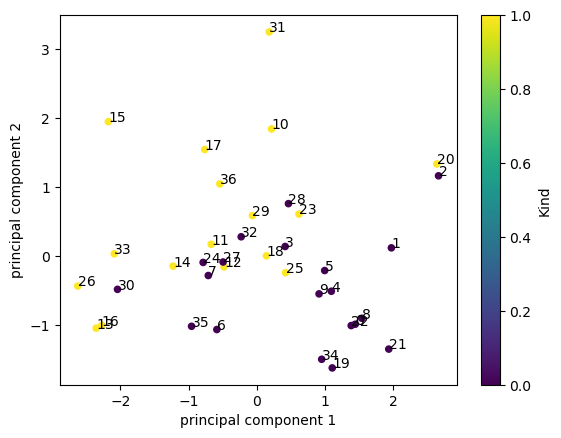

In [24]:
ax1 = result.plot.scatter(x='principal component 1',y='principal component 2',c='Kind', colormap='viridis')
for i, label in enumerate(result['test_name']):
    plt.annotate(i, (result['principal component 1'][i], result['principal component 2'][i]))

# Project new Workload

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pca.pca import *
import pandas as pd

filename = 'post_silicon/summary_phd.csv'
df_data = pd.read_csv(filename)
df_data.fillna(0,inplace=True)

if os.path.exists(filename):
    df = pd.read_csv(filename)
    display(df)
    df_ = df.loc[:, df.columns != 'test_name']
    df_ = (df_-df_.min())/(df_.max()-df_.min())
    extracted_col = df["test_name"]
    df_.insert(0, 'test_name', extracted_col)
    df_.set_index('test_name')
    df_.to_csv('normalized_df.csv')
    df = df_
    features = list(df.columns)[2:]
    test_column = list(df.columns)[0]
    pca_df = get_PCA(df, features)
    
else:
    print("Filename error")

x = get_features(df_data,features)
X_std = StandardScaler().fit_transform(x)

mean_v = (StandardScaler().fit(x).mean_)
scale_v = (StandardScaler().fit(x).scale_)

filename_new_test = 'post_silicon/summary_phd_benchdnn_fp.csv'
test_df = pd.read_csv(filename_new_test)
display(test_df)
test_array = test_df.iloc[0].values.tolist()
del test_array[0]


test_array = [0.97,0.166,0.88,42.5]
test_array_new = []
display(mean_v)
display(scale_v)
for count, element in enumerate(test_array):
    test_array_new.append((element - mean_v[count]) / scale_v[count])

display(test_array_new)

eig_vecs = get_eigen(X_std)[1]

# get first 2 eigenvectors
v1 = (eig_vecs[:, 0])
v2 = (eig_vecs[:, 1])
vectors = np.column_stack((v1, v2))

# do projection
pcas = dot_product(vectors, test_array_new)


,test_name,Kind,branch_misses,cache_misses,ipc,l1_dcache_load_misses
0,603.bwaves_s,0,0.13,96.237,0.28,5.04
1,607.cactuBSSN_s,0,0.16,71.072,0.37,22.01
2,619.lbm_s,0,2.28,92.758,0.08,26.26
3,621.wrf_s,0,1.29,24.804,0.19,10.33
4,627.cam_s,0,0.69,73.421,0.34,8.30
5,628.pop2_s,0,0.83,53.197,0.11,8.95
6,638.imagick_s,0,0.65,49.983,1.32,5.27
7,644.nab_s,0,2.44,36.855,0.83,2.63
8,649.fotonik3d_s,0,0.19,94.701,0.15,4.96
9,654.roms_s,0,0.35,58.811,0.29,8.08


,test_name,branch_misses,cache_misses,ipc,l1_dcache_load_misses
0,benchdnn_fp,0.18,23.127,0.08,4.84


array([ 2.18166667, 45.53377778,  0.71333333,  8.71333333])

array([ 2.37079979, 30.96071973,  0.55166415,  7.25835917])

[-0.5110792861391185,
 -1.4653334343052493,
 0.3021161823863955,
 4.6548628823021465]

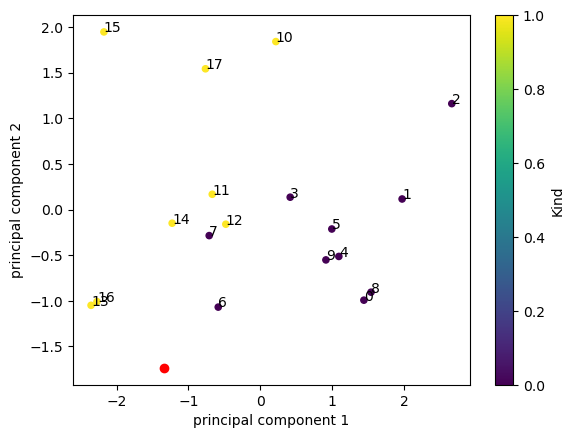

In [26]:
pca_df_new = pca_df
pca_df_new['Kind'] = df[['Kind']].copy()

ax1 = pca_df_new.plot.scatter(x='principal component 1',y='principal component 2',c='Kind', colormap='viridis')
for i, label in enumerate(pca_df_new['test_name']):
    plt.annotate(i, (pca_df_new['principal component 1'][i], pca_df_new['principal component 2'][i]))

plt.scatter(pcas[0], pcas[1], c='red')


In [27]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

# Create Decision Tree classifer object
#lf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)

# Train Decision Tree Classifer
display(X)
display(y)
clf = clf.fit(X,y)
#Predict the response for test dataset
y_pred = clf.predict([pcas])

print(y_pred)


,principal component 1,principal component 2
0,1.439857,-0.993053
1,1.971464,0.115144
2,2.662381,1.159666
3,0.414887,0.134920
4,1.091433,-0.514099
5,0.993906,-0.213617
6,-0.585874,-1.069071
7,-0.711624,-0.285858
8,1.539074,-0.905803
9,0.911681,-0.552093


0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
Name: Kind, dtype: float64

[0.]


/Users/vrodri3/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
